## Libraries

In [1]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
# Read the file resulsSPECIFICITY.csv into a pandas dataframe
df = pd.read_csv('resultsSPECIFICITY.csv', delimiter=';')

# Group the dataframe by OldFM, NewFM, Generator, and for the other columns compute the average
df = df.groupby(['OldFM', 'NewFM', 'Generator']).mean()
# Reset the index
df = df.reset_index()

## Wilcoxon-Signed Rank Tests

In [3]:
def test(datax, datay, label):
    test_times = stats.wilcoxon(datax, datay, alternative='two-sided', method='approx')
    print ("*** Test on " + label + " ***")
    print (test_times)
    print (datax.mean())
    print (datay.mean())
    print ("Effect size: " + str(test_times.zstatistic / math.sqrt(len(datax) + len(datay))))

### Fault detection

In [4]:
faultDetectionACTS = df.loc[df['Generator'] == 'ACTS', 'FaultDetection'].values
faultDetectionSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'FaultDetection'].values
faultDetectionBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'FaultDetection'].values
faultDetectionMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'FaultDetection'].values
# Test the difference between the two generators
test(faultDetectionACTS, faultDetectionSPEC, "ACTS vs SPECIFICITY")
test(faultDetectionACTS, faultDetectionBDD, "ACTS vs BDD")
test(faultDetectionACTS, faultDetectionMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(faultDetectionBDD, faultDetectionSPEC, "BDD vs SPECIFICITY")
test(faultDetectionBDD, faultDetectionMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")


*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=241.0, pvalue=0.8908605848200231)
0.7405411171205962
0.7401910493414635
Effect size: -0.010714718038005428
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=301.0, pvalue=0.8185488006057725)
0.7405411171205962
0.7401905080623307
Effect size: -0.017914058447860894
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=138.0, pvalue=0.5095441250827822)
0.7405411171205962
0.7405367821463416
Effect size: -0.051502022845487376
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=187.0, pvalue=0.7154697259047225)
0.7401905080623307
0.7401910493414635
Effect size: -0.02846423150300551
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=182.0, pvalue=0.8664265183929357)
0.7401905080623307
0.7405367821463416
Effect size: -0.013134156056427633
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=148.0, pvalue=0.6963079193828746)
0.7401910493414635
0.7405367821463416
Effect size: -0.

### Specificity

In [5]:
specificityACTS = df.loc[df['Generator'] == 'ACTS', 'Specificity'].values
specificitySPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Specificity'].values
specificityBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Specificity'].values
specificityMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Specificity'].values
# Test the difference between the two generators
test(specificityACTS, specificitySPEC, "ACTS vs SPECIFICITY")
test(specificityACTS, specificityBDD, "ACTS vs BDD")
test(specificityACTS, specificityMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(specificityBDD, specificitySPEC, "BDD vs SPECIFICITY")
test(specificityBDD, specificityMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(specificitySPEC, specificityMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=2.7015948487105505e-05)
0.4820944640975609
0.531137669296748
Effect size: -0.32775121882711133
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=63.0, pvalue=0.03924880796096683)
0.4820944640975609
0.4989648600338754
Effect size: -0.16098147666797008
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=254.5, pvalue=0.46178950128527485)
0.4820944640975609
0.491289201097561
Effect size: -0.057464399474557275
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=3.0, pvalue=4.0253693159493835e-05)
0.4989648600338754
0.531137669296748
Effect size: -0.32062619233086975
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=252.0, pvalue=0.43646537709366684)
0.4989648600338754
0.491289201097561
Effect size: -0.06076532160684663
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=163.0, pvalue=0.021429990328907453)
0.531137669296748
0.491289201097561
Effect size: -0.1

### Time

In [6]:
timeACTS = df.loc[df['Generator'] == 'ACTS', 'Time'].values
timeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Time'].values
timeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Time'].values
timeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Time'].values
# Test the difference between the two generators
test(timeACTS, timeSPEC, "ACTS vs SPECIFICITY")
test(timeACTS, timeBDD, "ACTS vs BDD")
test(timeACTS, timeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(timeBDD, timeSPEC, "BDD vs SPECIFICITY")
test(timeBDD, timeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(timeSPEC, timeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=3.663890942678321e-15)
107.1822493224932
26.902574525745255
Effect size: -0.6142253066039589
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=0.0, pvalue=3.663890942678321e-15)
107.1822493224932
42.389024390243904
Effect size: -0.6142253066039589
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.663583406673553e-15)
107.1822493224932
25.438211382113828
Effect size: -0.6142261270385183
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=13.0, pvalue=5.910436802212473e-15)
42.389024390243904
26.902574525745255
Effect size: -0.6095340586622644
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.663275894851821e-15)
42.389024390243904
25.438211382113828
Effect size: -0.6142269474763654
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=442.0, pvalue=2.6717044653518603e-08)
26.902574525745255
25.438211382113828
Effect size: -0.43

### Size

In [7]:
sizeACTS = df.loc[df['Generator'] == 'ACTS', 'Size'].values
sizeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Size'].values
sizeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Size'].values
sizeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Size'].values
# Test the difference between the two generators
test(sizeACTS, sizeSPEC, "ACTS vs SPECIFICITY")
test(sizeACTS, sizeBDD, "ACTS vs BDD")
test(sizeACTS, sizeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(sizeBDD, sizeSPEC, "BDD vs SPECIFICITY")
test(sizeBDD, sizeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(sizeSPEC, sizeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=567.0, pvalue=0.3679143535045222)
8.475609756097562
8.685907859078592
Effect size: -0.07030840998814818
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=660.5, pvalue=0.9812893455118291)
8.475609756097562
8.576287262872627
Effect size: -0.0018313308179716114
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=713.0, pvalue=0.0011662052575471718)
8.475609756097562
7.097560975609756
Effect size: -0.25354960101138146
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=275.0, pvalue=0.04366511224381909)
8.576287262872627
8.685907859078592
Effect size: -0.15752399362396555
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=758.5, pvalue=0.002901297369164422)
8.576287262872627
7.097560975609756
Effect size: -0.23254324683994232
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=760.0, pvalue=0.0029860524032182287)
8.685907859078592
7.097560975609756
Effect size: -0.23185

### Tuples Covered

In [8]:
tpACTS = df.loc[df['Generator'] == 'ACTS', 'CombinatorialCoverage'].values
tpSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'CombinatorialCoverage'].values
tpBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'CombinatorialCoverage'].values
tpMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'CombinatorialCoverage'].values
# Test the difference between the two generators
test(tpACTS, tpMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(tpBDD, tpMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(tpSPEC, tpMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.535344715819789e-15)
1.0
0.4612083706097561
Effect size: -0.6145742877861664
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.535344715819789e-15)
1.0
0.4612083706097561
Effect size: -0.6145742877861664
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.535344715819789e-15)
1.0
0.4612083706097561
Effect size: -0.6145742877861664


## Box-Plots

In [9]:
def box_plot(y1, y2, y3, y4, ylabel, xscale = 'log', plot_correspondence = False, scale = 1, showfliers = True):
    plt.figure(figsize=(4,2.5))
    sns.boxplot(data=[y1/scale, y2/scale, y3/scale, y4/scale], orient='h', showfliers = showfliers, showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"white"})
    plt.xscale(xscale)
    plt.yticks(range(4), labels=['ACTS', 'BDD', 'SPECGEN', 'MUTTESTGEN'])
    plt.xlabel(ylabel)
    plt.show()

### Fault detection

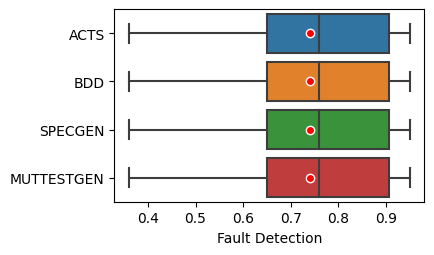

In [10]:
box_plot(faultDetectionACTS, faultDetectionBDD, faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, 'Fault Detection', xscale = 'linear', scale = 1, showfliers = False)

### Specificity

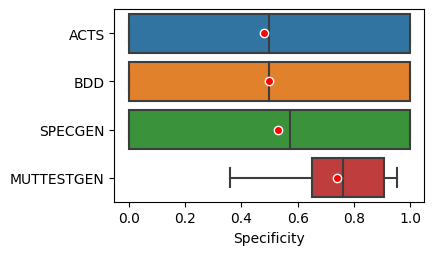

In [11]:
box_plot(specificityACTS, specificityBDD, specificitySPEC, faultDetectionMUTTESTGENERATOR, 'Specificity', xscale = 'linear', scale = 1, showfliers = False)

### Time

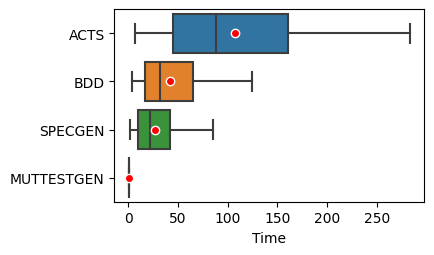

In [12]:
box_plot(timeACTS, timeBDD, timeSPEC, faultDetectionMUTTESTGENERATOR, 'Time', xscale = 'linear', scale = 1, showfliers = False)

### Size

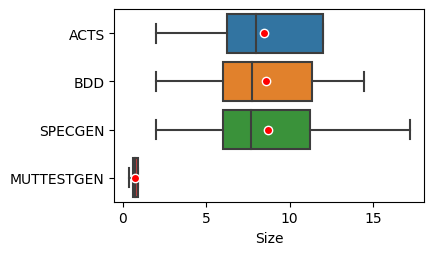

In [13]:
box_plot(sizeACTS, sizeBDD, sizeSPEC, faultDetectionMUTTESTGENERATOR, 'Size', xscale = 'linear', scale = 1, showfliers = False)

### Tuples Covered

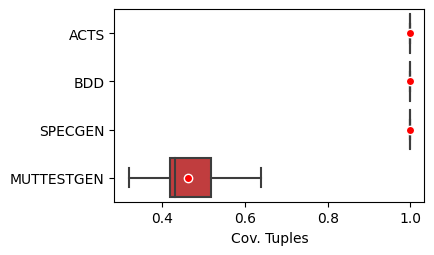

In [14]:
box_plot(tpACTS, tpBDD, tpSPEC, tpMUTTESTGENERATOR, 'Cov. Tuples', xscale = 'linear', scale = 1, showfliers = False)